## **DATA CLEANING**

In [65]:
# Import the necessary libraries 
import pandas as pd
import sqlite3

**1. tn.movie_budgets.csv**

In [66]:
# Load the dataframe
tn_df = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
tn_df.head()



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [67]:
# Gives us a concise summary of our dataframe by giving us basic information of the dataframe
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


From our findings above, we can see that our dataframe has 5782 entries and 36 columns in total. We have 5 columns in the string format and one other column in the integer format(int64). 

In [68]:
# Check the summary statistics of our dataframe
tn_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [69]:
# Shows us the number of rows and columns in our dataframe
print('The dataframe contains:', tn_df.shape[0],'rows')
print('The dataframe contains:', tn_df.shape[1],'columns')


The dataframe contains: 5782 rows
The dataframe contains: 6 columns


**Handling missing values and duplicate values**

In [70]:
#First check for null values
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in our dataframe.

In [71]:
#Check for duplicates
tn_df.duplicated().sum()

0

We can also see that our dataframe has no duplicates.We also have no need for the release date column in our dataframe so we will drop it. 

In [72]:
# Dropping the release_date column
tn_df= tn_df.drop('release_date', axis=1)
tn_df

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


**Cleaning the production_budget, domestic_gross and worldwide_gross columns**

In [ ]:
# Checking the datatypes
tn_df.dtypes

id                    int64
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

Our columns represent financial information so its important for us to work with them in integer or float form so that we are able to perform mathematical operations on them. Since the three columns have object data types, we will convert them into integers.

In [ ]:
# Removing the dollar signs and commas from the columns
tn_df['worldwide_gross']= tn_df['worldwide_gross'].replace('[\$,]', '', regex= True)
tn_df['production_budget']= tn_df['production_budget'].replace('[\$,]', '', regex= True)
tn_df['domestic_gross']= tn_df['domestic_gross'].replace('[\$,]', '', regex= True)

# Converting the columns into integers
tn_df['worldwide_gross']= tn_df['worldwide_gross'].astype('int64')
tn_df['production_budget']= tn_df['production_budget'].astype('int64')
tn_df['domestic_gross']= tn_df['domestic_gross'].astype('int64')

# Previewing the first five results
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,Dark Phoenix,350000000,42762350,149762350
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [ ]:
# Checking to see if there are any 0 values in our worldwide_gross column
(tn_df['worldwide_gross'] == 0).sum()

367

We have 367 zero values in our column, we will drop these records and retain the rest.

In [ ]:
# Retaining the rows where the values in the worldwide_gross is greater than zero
tn_df = tn_df[tn_df['worldwide_gross'] > 0]

# Checking that the zero values have been dropped
assert (tn_df['worldwide_gross']== 0).sum() == 0

**Checking for outliers in the production_budget column**

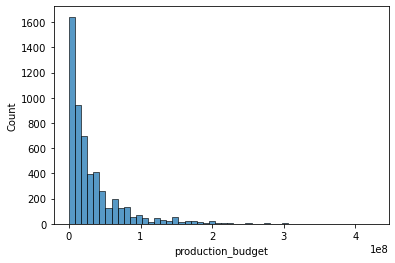

In [ ]:
import seaborn as sns
sns.histplot(tn_df['production_budget'], bins=50);


The  **production budget** is **left-skewed**, which means:
- There are **fewer films with very low budgets**, which pull the **tail to the left**.
  
- Most films in the  dataset had **large budgets**.
- Only a few had **unusually small budgets**, making them the outliers on the lower end.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tn_df['production_budget'].quantile(0.25)
Q3 = tn_df['production_budget'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = tn_df[(tn_df['production_budget'] < lower_bound) | (tn_df['production_budget'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['production_budget']])

We keep the outliers since these are true values. 

**Checking for outliers in the worldwide_gross column**

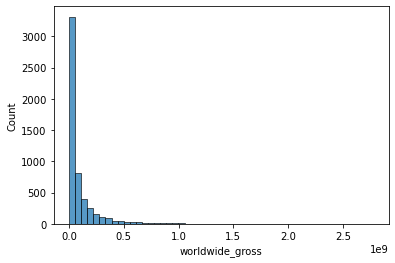

In [ ]:
sns.histplot(tn_df['worldwide_gross'], bins=50);

The tail is longer to the left.Most films in the dataset likely had high gross earnings, while a few had very low earnings that pull the distribution left.

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = tn_df['worldwide_gross'].quantile(0.25)
Q3 = tn_df['worldwide_gross'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = tn_df[(tn_df['worldwide_gross'] < lower_bound) | (tn_df['worldwide_gross'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print(outliers[['worldwide_gross']])

Number of outliers: 564
      worldwide_gross
0          2776345279
1          1045663875
3          1403013963
4          1316721747
5          2053311220
...               ...
4249        278964806
4567        390525192
4589        261249383
4775        263591415
5346        268000000

[564 rows x 1 columns]


We also keep the outliers in the worldwide_gross column.

Now we will create a profit column that will allow us to see the profitability of each movie.



In [ ]:
# Subtracting the production_budget from the worldwide_gross to calculate profit
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

# Previewing the first five rows
tn_df.head()


,id,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,Avatar,425000000,760507625,2776345279,2351345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


**2.im.db**

In [81]:
import zipfile

# Extract the database file from the ZIP archive
with zipfile.ZipFile('zippedData\im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

# Connect to the extracted SQLite database
conn = sqlite3.connect('zippedData/im.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"

tables = pd.read_sql_query(query, conn)

print("Tables in the database:")
print(tables)

Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [87]:
query = """
    SELECT *
    FROM (
        SELECT *
        FROM persons
        JOIN directors USING (person_id)
        JOIN movie_basics USING (movie_id)
        JOIN movie_ratings USING (movie_id)
    ) AS subquery;
"""
imdb_df = pd.read_sql(query, conn)
imdb_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
1,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
2,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
3,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt1592569,Paano na kaya,Paano na kaya,2010,110.0,"Drama,Romance",6.4,77
4,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous",tt2057445,No Other Woman,No Other Woman,2011,101.0,"Drama,Romance,Thriller",6.4,256


In [88]:
imdb_df = imdb_df.drop(['birth_year', 'death_year', 'primary_profession', 'start_year', 'numvotes', 'primary_title', 'original_title'], axis=1)
imdb_df.head()

,person_id,primary_name,movie_id,runtime_minutes,genres,averagerating
0,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
1,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
2,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
3,nm0062879,Ruel S. Bayani,tt1592569,110.0,"Drama,Romance",6.4
4,nm0062879,Ruel S. Bayani,tt2057445,101.0,"Drama,Romance,Thriller",6.4


In [89]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181387 entries, 0 to 181386
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   person_id        181387 non-null  object 
 1   primary_name     181387 non-null  object 
 2   movie_id         181387 non-null  object 
 3   runtime_minutes  163584 non-null  float64
 4   genres           180047 non-null  object 
 5   averagerating    181387 non-null  float64
dtypes: float64(2), object(4)
memory usage: 8.3+ MB


In [90]:
imdb_df.describe()

,runtime_minutes,averagerating
count,163584.000000,181387.000000
mean,97.789484,6.217683
std,194.434689,1.388026
min,3.000000,1.000000
25%,84.000000,5.400000
50%,94.000000,6.300000
75%,107.000000,7.200000
max,51420.000000,10.000000


In [91]:
imdb_df.shape

(181387, 6)

In [92]:
imdb_df.isnull().sum()

person_id              0
primary_name           0
movie_id               0
runtime_minutes    17803
genres              1340
averagerating          0
dtype: int64

In [93]:
imdb_df.dropna(subset=['runtime_minutes', 'genres'], inplace= True)


In [94]:
imdb_df['runtime_minutes']= imdb_df['runtime_minutes'].astype('int64')

In [95]:
# Verifying the column for runtime_minutes is changed
assert imdb_df['runtime_minutes'].dtype == 'int64', "Conversion to int64 failed"

##### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## **Exploratory Data Analysis**

In this section, we perform Exploratory Data Analysis (EDA) to summarize and visualize the
main characteristics of our datasets.


**Univariate Analysis**

In this section, we examine the distribution of the production budget variable using a combination of a histogram and a Kernel Density Estimate (KDE) plot. This helps visualize how production budgets are spread across different movies, highlighting patterns such as skewness and the presence of extreme values. By understanding this distribution, we can make informed decisions about how to handle the data in later stages of analysis.

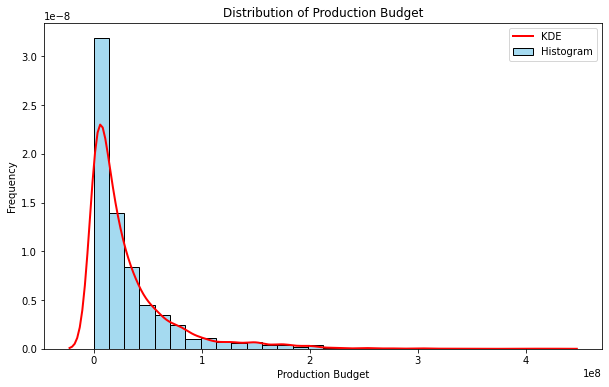

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Histogram and KDE together
plt.figure(figsize=(10, 6))
sns.histplot(tn_df['production_budget'], bins=30, color='skyblue', edgecolor='black', stat='density', label='Histogram')
sns.kdeplot(tn_df['production_budget'], color='red', linewidth=2, label='KDE')
plt.title('Distribution of Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.legend()
plt.show()



**Distribution of Production Budgets in Relation to Movie Frequency**  
- Most films are produced with relatively low budgets, as shown by the concentration of entries on the lower end of the budget range.  
- There is a noticeable decline in the number of movies as production budgets rise, indicating that high-budget films are less common.

**Bivariate Analysis**

 **Relationship Between Production Budgets and Profits for Movies**
Bivariate analysis examines the relationship between two variables. It helps you understand how one variable changes in relation to another—whether there's a correlation, trend, or association between them. So we are going to be comparing production budget and profit to see if higher budgets lead to more profit.

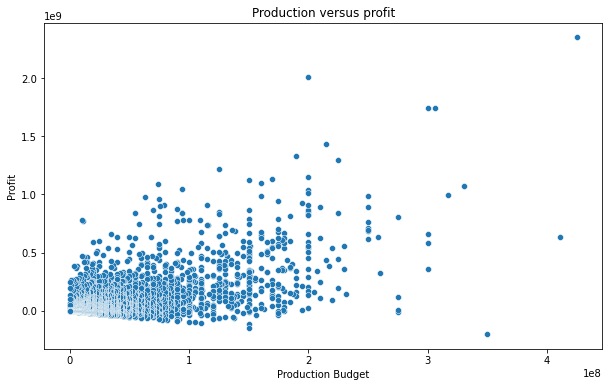

In [ ]:

# Calculate the profit column
tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

# Creating the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='profit', data = tn_df)
plt.xlabel('Production Budget')
plt.ylabel('Profit')
plt.title('Production versus profit')
plt.show()

The scatter plot shows that movies with larger production budgets tend to generate higher profits, as indicated by the greater concentration of high-profit points at the upper end of the budget scale.

**Multivariate analysis**



In the Multivariate Analysis section, we explore the relationships among more than two variables at once. This broader perspective allows for a more thorough understanding of the data's complexity, revealing patterns, associations, and key factors essential for developing strong and precise predictive models.

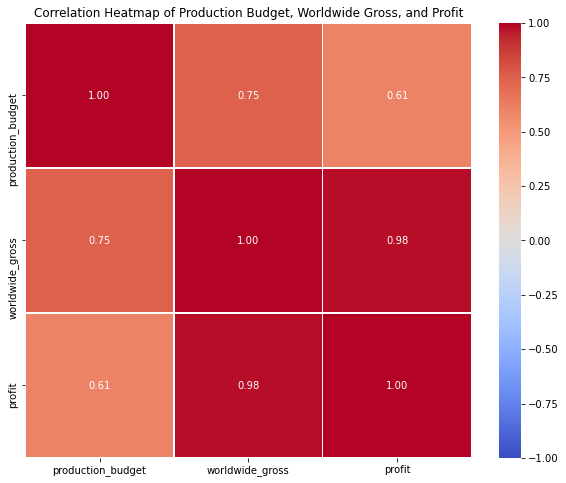

In [ ]:
# Select the columns to use
columns = ['production_budget', 'worldwide_gross', 'profit']
# Creating a subset of the DataFrame with the specified columns
Heatmap_df = tn_df[columns]
# Computing the correlation matrix
corr_matrix = Heatmap_df.corr()
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Production Budget, Worldwide Gross, and Profit')
plt.show()

Production Budget versus. Worldwide Gross: There is a strong positive correlation of 0.75 indicating that movies with larger production budgets typically achieve higher worldwide gross revenues.

Production Budget versus. Profit: A moderate positive correlation of 0.61 suggests that increasing the production budget often leads to higher profits, though this link is not as strong as with worldwide gross.

Worldwide Gross versus Profit: Although the specific correlation value isn't provided, the relationship is expected to be strong, given the positive ties both metrics have with production budget.

## **Hypothesis Testing** 

Evaluating the Relationship Between production Budget and Profitability
To better understand how financial inputs and outcomes are interconnected in the film industry, we aim to assess whether a movie’s production budget  significantly influence its profitability. This exploration is grounded in the following hypotheses:

H₀:There is no significant linear relationship between production budget and  profitability.

H₁:There is a significant linear relationship between production budget and profitability.



**The Pearson correlation coefficient was computed to determine the linear association between production budget and profit.**

In [ ]:
from scipy.stats import pearsonr

# set the alpha to 0.05
alpha = 0.05
# Calculate both the Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(tn_df['production_budget'], tn_df['profit'])
print(f"The P-value is : {p_value}")
print(f"The Pearson Correlation Coefficient is: {correlation}")

if p_value < alpha:
	print("Reject the null hypothesis.There is a significant linear relationship between the profit and production budget")
else:
	print("Fail to reject the null hypothesis. There is no sufficient evidence to show a linear relationship between the profit and production budget")


The P-value is : 0.0
The Pearson Correlation Coefficient is: 0.6087521471718887
Reject the null hypothesis.There is a significant linear relationship between the profit and production budget


From the output above we can clearly see that A moderate positive correlation of 0.61 suggests that increasing the production budget often leads to higher profits, though this link is not as strong as with worldwide gross.
Moreover from our correlation matrix we can see that there is a strong positive correlation of 0.75 indicating that movies with larger production budgets typically achieve higher worldwide gross revenues.
 
 This could further be shown visually as shown in the figure below



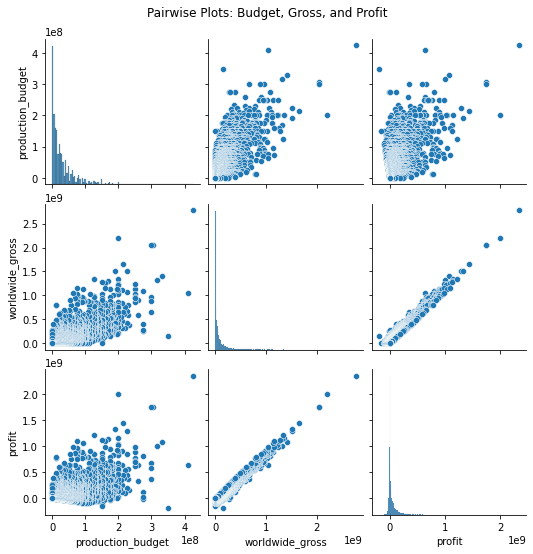

In [ ]:
# Pairplot for visualization
sns.pairplot(tn_df[['production_budget', 'worldwide_gross', 'profit']])
plt.suptitle('Pairwise Plots: Budget, Gross, and Profit', y=1.02)
plt.show()

**Conclusions**
 
 Increasing the production budget often leads to higher profits
 Movies with larger production budgets typically achieve higher worldwide gross revenues.
 

**Recommendations**

Enhance Profitability Tracking: Implement metrics for profit margin and return on investment (ROI) to better evaluate the success of each project.
Refine Budget Allocation Strategies: Invest in production budgets that are high enough to drive profitability, but remain mindful of overspending. Analyze past performance to identify a budget threshold that maximizes returns without crossing into diminishing profit margins.